In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
import matplotlib.pyplot as plt
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [3]:
df = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Datasets\BUNDESBANK-BBK01_WT5511.csv",index_col=0)
df.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [4]:


# Convert the index column to a datetime format
df.index = pd.to_datetime(df.index, format="%b-%y")

# Change the datetime format to "MM-YYYY"
df.index = df.index.strftime("%m-%Y")

# Print the updated DataFrame
print(df)


ValueError: time data '30-04-1968' does not match format '%m-%y' (match)

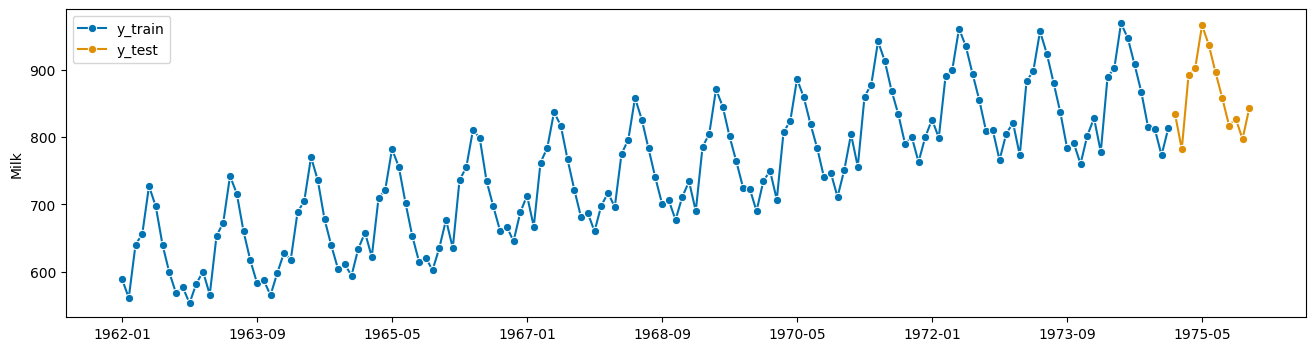

11.93580890940159
5401.230643923246
144.16552521409312
                                 ETS Results                                  
Dep. Variable:                   Milk   No. Observations:                  156
Model:                       ETS(AAA)   Log Likelihood                -527.851
Date:                Mon, 17 Jul 2023   AIC                           1091.703
Time:                        14:54:20   BIC                           1146.600
Sample:                    01-31-1962   HQIC                          1114.000
                         - 12-31-1974   Scale                           50.879
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.6988      0.078      8.984      0.000       0.546       0.851
smoothing_trend      6.988e-05        nan        

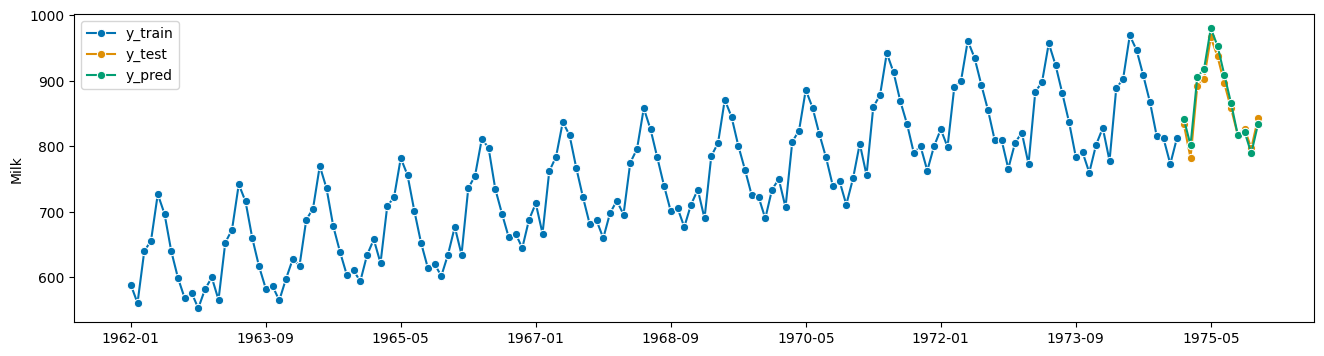

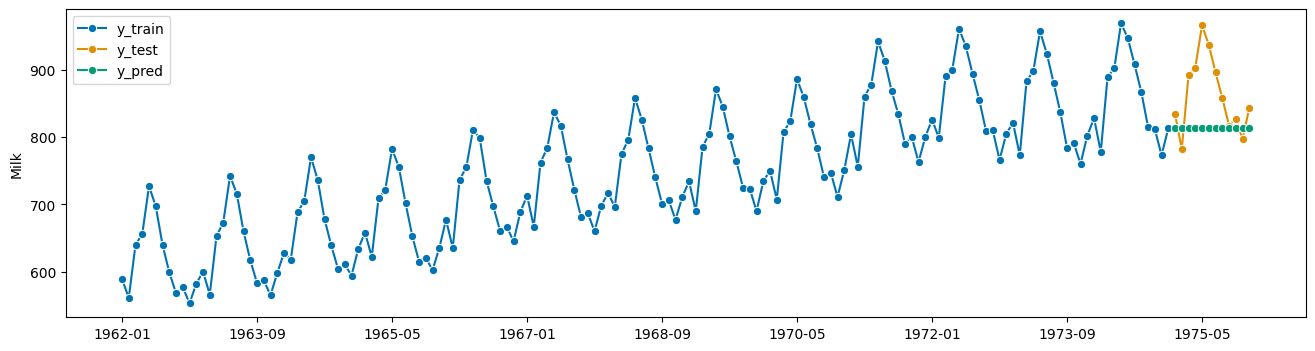

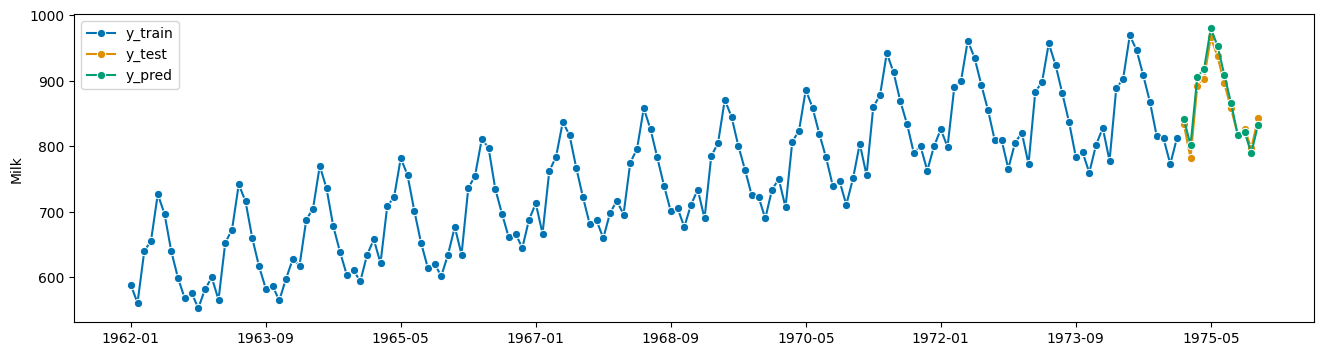

In [9]:
y = df['Milk']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()

"""Specifying the Forecasting Horizon"""

fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

"""**Exponential Smoothing**"""

forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=True))

"""**ETS fitting**

Simple Exponential Smoothing
"""

forecaster = AutoETS(auto=False, sp=12,error='add',trend=None,seasonal=None)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

"""Auto-Tuned"""

forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

print(forecaster.summary())